In [1]:
import pandas as pd

In [32]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [33]:
# Tradução
columns_name = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados.rename(columns=columns_name, inplace=True)
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [34]:
#Trocar valores
a_trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


Para gerar mais relevância que tal converter de ano do modelo para idade do carro. (O que impacta na performance, é o modelo grande, pequeno)

In [37]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


Vamos converter de miles para km

In [38]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290
...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,16,25060.64248
9996,9996,13246,2002,107424.63,1,20,21317.31764
9997,9997,13018,2014,93856.99,0,8,20950.38812
9998,9998,10464,2011,51250.57,1,11,16840.13376


Precisamos eliminar as colunas que nao sao uteis ao aprendizadp

In [39]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

SEED = 20
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)

print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

Treinaremos com 7500 elementos e testaremos com
2500
          preco  idade_do_modelo   km_por_ano
5794   52015.02               24  43527.81898
6106   48109.83               16  35353.98112
8810   89586.74               19  10211.26230
9338   54703.25               18  33295.63526
480    49765.05               15  25313.30886
...         ...              ...          ...
5947   98621.55               16  26555.71934
7592   81374.29               21  17047.73862
6269   85284.52               23  31543.06400
979   106145.48               24  24867.52168
8748   45788.95               20  22392.35676

[7500 rows x 3 columns]
Taxa de acerto: 57.0%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Comparando com classificador base

# agora vamos testar a função não linear

In [41]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print(f"A acurácia do dummy stratified foi {round(acuracia, 2)}")

A acurácia do dummy stratified foi 58.0


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)

print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

modelo = SVC()
modelo.fit(treino_x, treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

Treinaremos com 7500 elementos e testaremos com
2500
          preco  idade_do_modelo   km_por_ano
9458  105994.83               21  17781.59766
9105   56442.86               19  12221.32796
3925   84134.44               21  28152.18462
7315   54495.45               14  27199.45534
3185   94073.18               15  26410.87874
...         ...              ...          ...
9876   65606.22               24  22599.96162
5540   52685.72                9  16750.01072
4709  104112.87               20  35492.38436
3358   76111.58               18  14854.20820
2006   64415.01               23  17405.01210

[7500 rows x 3 columns]
Taxa de acerto: 78.24%


VAMOS VER POR ARVORE DE DECISAO

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
# y = dados['vendido']

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)

print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, raw_treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

Treinaremos com 7500 elementos e testaremos com
2500
          preco  idade_do_modelo   km_por_ano
9458  105994.83               21  17781.59766
9105   56442.86               19  12221.32796
3925   84134.44               21  28152.18462
7315   54495.45               14  27199.45534
3185   94073.18               15  26410.87874
...         ...              ...          ...
9876   65606.22               24  22599.96162
5540   52685.72                9  16750.01072
4709  104112.87               20  35492.38436
3358   76111.58               18  14854.20820
2006   64415.01               23  17405.01210

[7500 rows x 3 columns]
Taxa de acerto: 73.32%


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
# y = dados['vendido']

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)

print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, raw_treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

Treinaremos com 7500 elementos e testaremos com
2500
[[ 1.62663622  0.66907903 -0.62913537]
 [-0.33714655  0.24235232 -1.31870128]
 [ 0.76029211  0.66907903  0.65698987]
 ...
 [ 1.5520527   0.45571567  1.5672967 ]
 [ 0.44233999  0.02898897 -0.99218034]
 [-0.0212041   1.09580574 -0.67583824]]
Taxa de acerto: 58.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


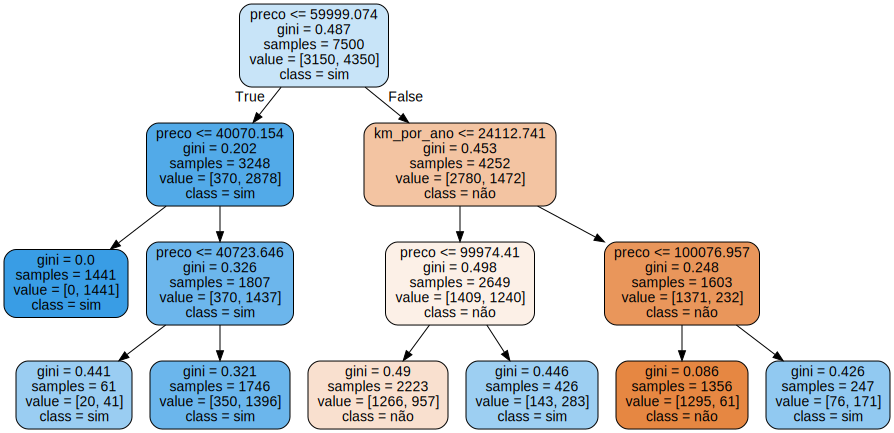

In [53]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, feature_names=features, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
# y = dados['vendido']

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)

print(f"""Treinaremos com {len(treino_x)} elementos e testaremos com
{len(teste_x)}""")

scaler = StandardScaler()
scaler.fit(treino_x) # ou x
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, raw_treino_y)
print(treino_x)
previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(f'Taxa de acerto: {round(taxa_de_acerto,2)}%')

Treinaremos com 7500 elementos e testaremos com
2500
[[ 1.62663622  0.66907903 -0.62913537]
 [-0.33714655  0.24235232 -1.31870128]
 [ 0.76029211  0.66907903  0.65698987]
 ...
 [ 1.5520527   0.45571567  1.5672967 ]
 [ 0.44233999  0.02898897 -0.99218034]
 [-0.0212041   1.09580574 -0.67583824]]
Taxa de acerto: 58.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
!pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==

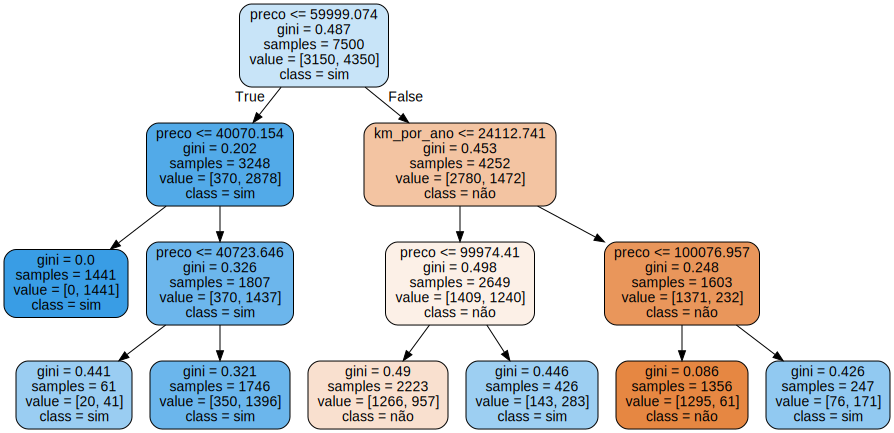

In [56]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, feature_names=features, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico